# Mapping subgenre taxonomies

### MIR

#### Francesc Lluís Salvadó

### Goal

The main goal of this lab is to to explore how sub-genres across different taxonomies within a source are related.

### Downloading data

We will use TagTraum dataset subgenre annotations. Tagtraum (http://www.tagtraum.com) is based on collaborative music tagging platforms with large amounts of genre labels provided by their users for music recordings (tracks).

In [1]:
import urllib.request
import bz2
import os, sys
import csv

url = 'http://www.dtic.upf.edu/~aporter/amplab/acousticbrainz-mediaeval2017-tagtraum-train.tsv.bz2'
#Downloading the bz2 file from the url
filename = 'acousticbrainz-mediaeval2017-tagtraum-train.tsv.bz2'
urllib.request.urlretrieve(url,filename)

newfilename = filename[:-4]

with open(newfilename, 'wb') as new_file, bz2.BZ2File(filename, 'rb') as file:
        for data in iter(lambda : file.read(100 * 1024), b''):
            new_file.write(data)

os.remove(filename)

### Reading data
Each subgenre in the datasets is expressed as a string "genrename---subgenrename". Following, for each song we will retrieve each associated subgenres.

In [2]:
NUMBER_OF_SONGS_TO_ANALYZE = 1000

j = 1
songs_subgen = []
with open(newfilename) as f:
    reader = csv.reader(f, dialect=csv.excel_tab)
    for line in reader:
        line_subgen = []
        for i in range(2, len(line)):
            sep = line[i].split('---')
            if len(sep) > 1:
                subgen = sep[1]
                line_subgen.append(subgen)
        songs_subgen.append(line_subgen)
        songs_subgen = [song_subgen for song_subgen in songs_subgen if song_subgen != []]
        if j == NUMBER_OF_SONGS_TO_ANALYZE:
            break
        j += 1
print('Subgenres associated to the first 5 songs:')
_ = [print('Song '+str(i+1)+' subgenres: '+str(song_subgen)) for i, song_subgen in enumerate(songs_subgen[:5])]

Subgenres associated to the first 5 songs:
Song 1 subgenres: ['jazzvocals', 'standards']
Song 2 subgenres: ['bigband']
Song 3 subgenres: ['alternative', 'britpop']
Song 4 subgenres: ['electronicafusion', 'elektro', 'ethnic', 'middleeastern']
Song 5 subgenres: ['ethnic', 'worldfusion']


### Creating Bag of Words

We will create a bag of words treating each song sub-genres as belonging to the same document and usin as "word" all the sub-genre name. When building the vocabulary, some sub-genres are ignored if their document frequency appearance is strictly lower than a given threshold

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

THRESHOLD = 60

vectorizer = CountVectorizer(min_df=THRESHOLD, tokenizer=lambda doc: doc, lowercase=False)
bow = vectorizer.fit_transform(songs_subgen).todense().T
labels = vectorizer.get_feature_names()

### Calculating distances

Cosine distance is computed for every sub-genre vectors

In [4]:
from scipy.spatial.distance import pdist
dist = pdist(bow, 'cosine')

### Hierarchical clustering

We use the Nearest Point algorithm to perform hierarchical clustering. Then, a dendogram is created for illustrating how each cluster is composed.

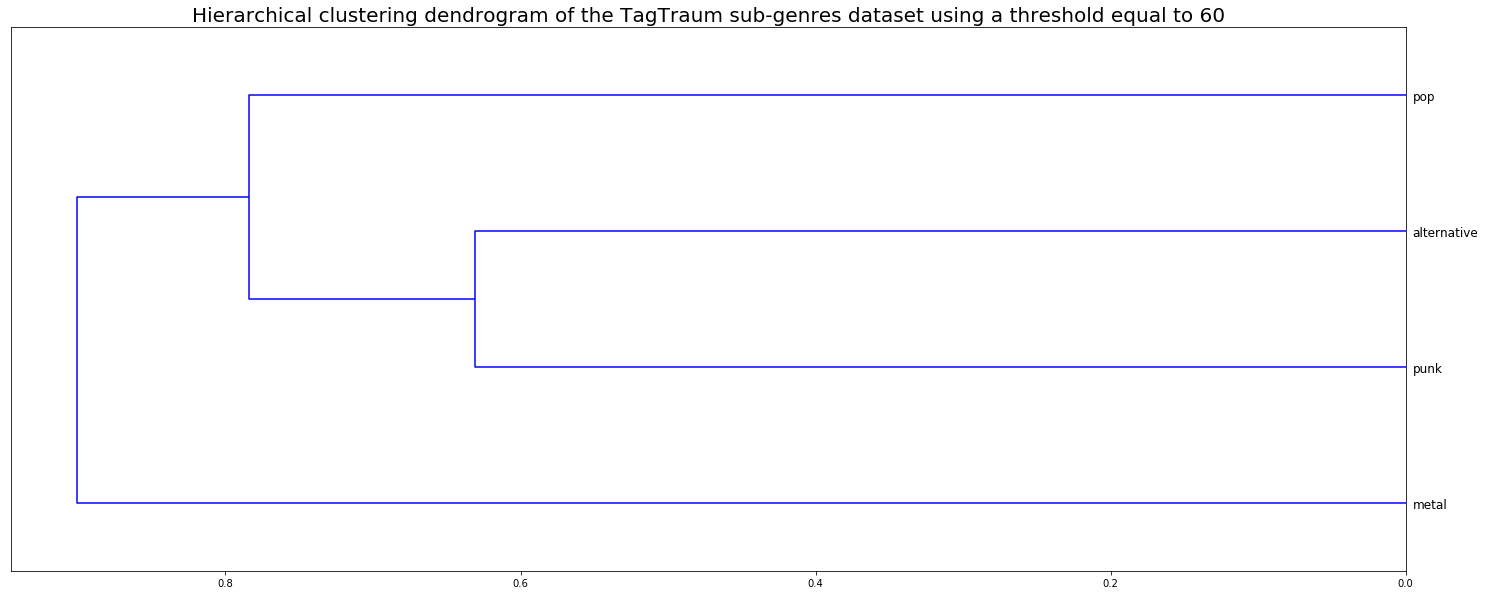

In [5]:
%matplotlib inline
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib 
from matplotlib import pyplot as plt
Z = linkage(dist, optimal_ordering=True)
plt.figure(figsize=(25, 10))
dendrogram(Z, labels=labels, orientation='left')
plt.title('Hierarchical clustering dendrogram of the TagTraum sub-genres dataset using a threshold equal to '
              +str(THRESHOLD), fontsize = 20)
plt.show()

### Using other thresholds

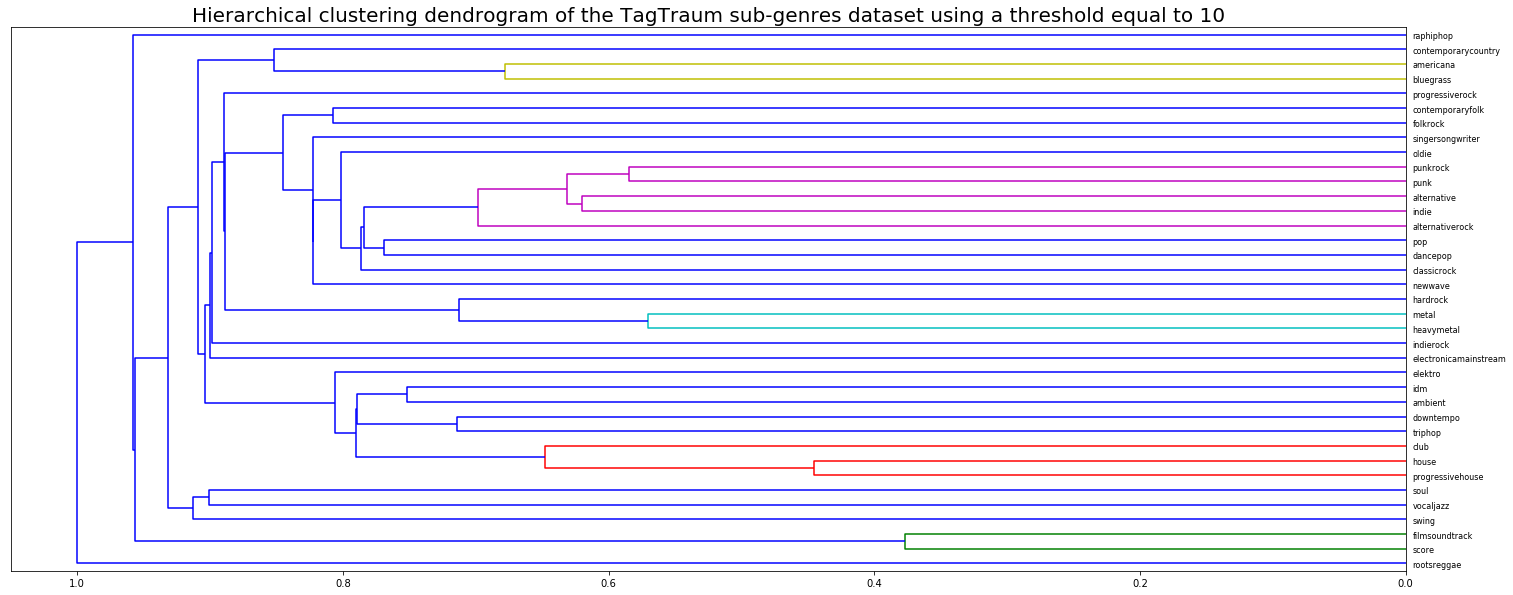

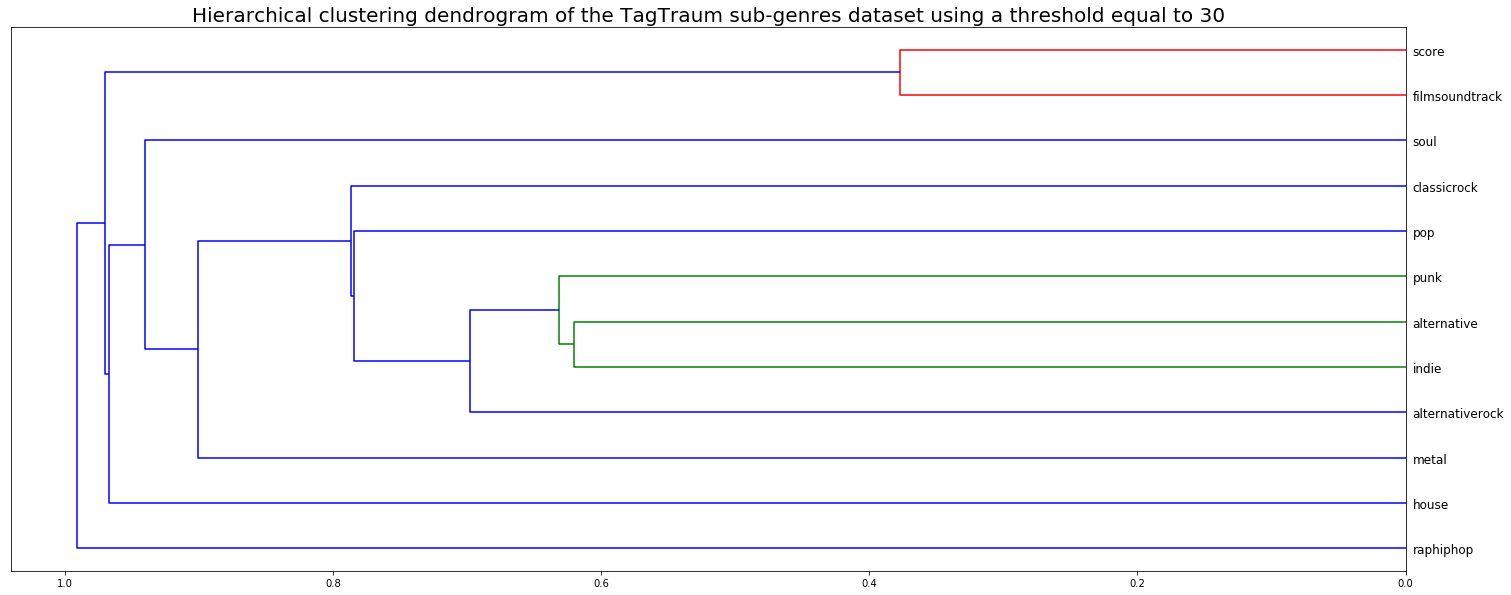

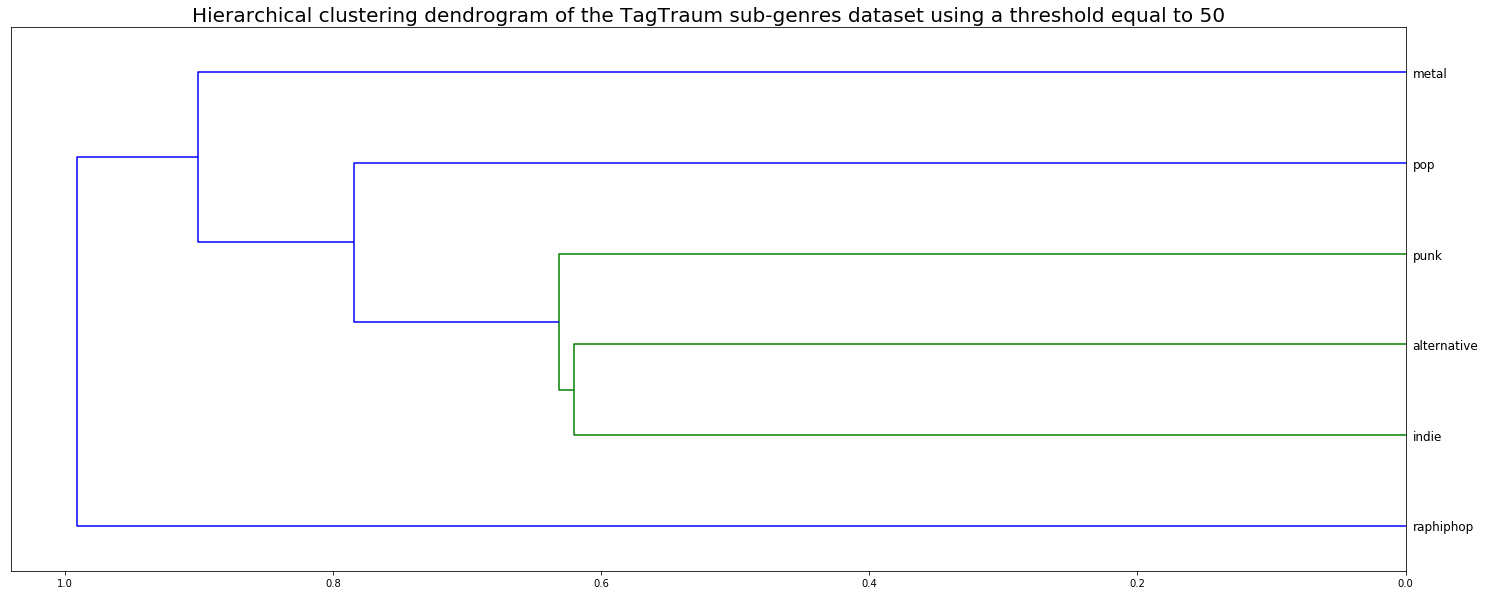

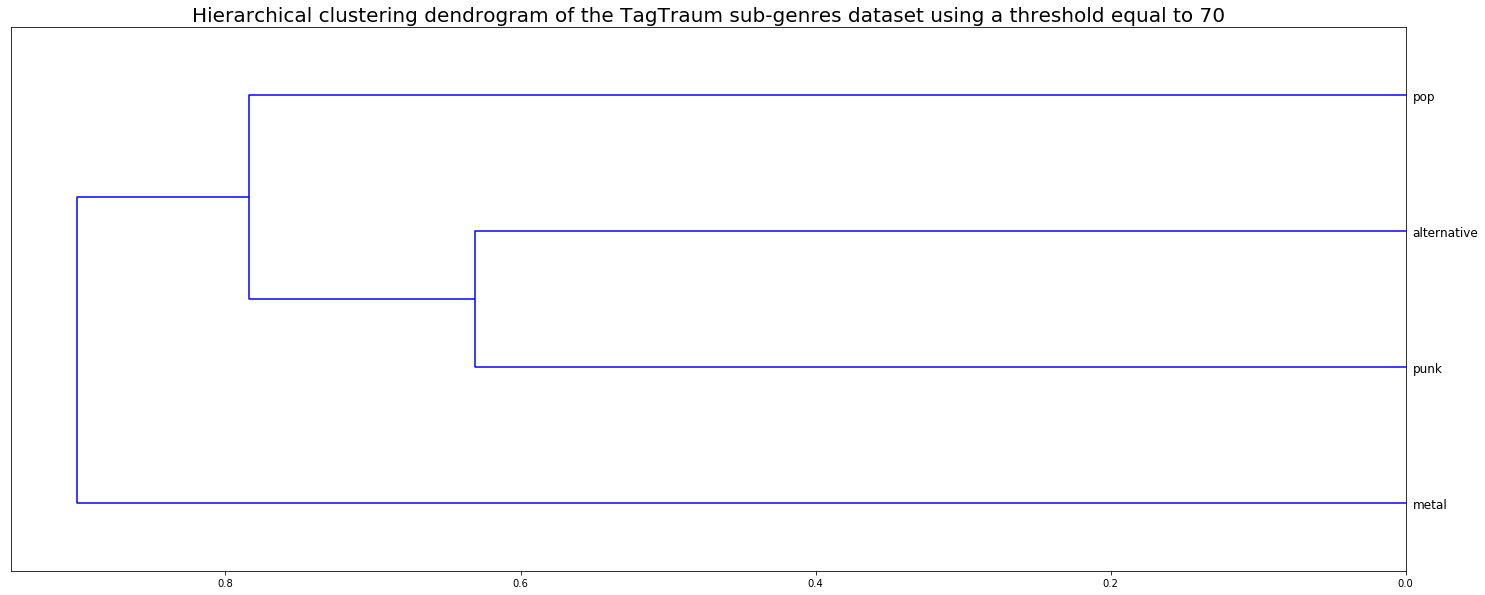

In [6]:
THRESHOLDS = np.arange(10, 80, 20)

for THRESHOLD in THRESHOLDS:
    vectorizer = CountVectorizer(min_df=THRESHOLD, tokenizer=lambda doc: doc, lowercase=False)
    bow = vectorizer.fit_transform(songs_subgen).todense().T
    labels = vectorizer.get_feature_names()
    dist = pdist(bow, 'cosine')
    Z = linkage(dist, optimal_ordering=True)
    plt.figure(figsize=(25, 10))
    dendrogram(Z, labels=labels, orientation='left')
    plt.title('Hierarchical clustering dendrogram of the TagTraum sub-genres dataset using a threshold equal to '
              +str(THRESHOLD), fontsize = 20)
    plt.show()